## The Evolution of Open-Form Scores 
It is useful for us to be able to tell how experimental the comic style is in the context of the entire corpus of the French five-act comedies in verse. We will define the more experimental style as the style that tends to have:
- a higher number of dramatic characters
- a higher mobility coefficient
- a higher standard range of the number of speaking characters (sigma)
- a higher percentage of polylogues
- a lower percentage of monologues.

We assume that all the examined features contribute to the "openness" of style. 

We will take a closer look at the evolution of comic style by decades.
- We will introduce **open-form scores** that measure how experimental a style of a particular decade is.
- We will trace the evolution of these scores by decades over three centuries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
data = pd.read_csv('../French_Comedies/Data/French_Comedies_Data.csv')

In [3]:
# include only five act comedies and only original comedies
original_comedies = data[(data['num_acts'] ==5)&
                         (data['translation/adaptation/contrastive'] == 0)].copy()
sorted_comedies = original_comedies.sort_values(by='date')

In [4]:
def interval_data(data_df, feature):
    overall_mean = round(data_df[feature].mean(), 2)
    overall_std = round(data_df[feature].std(), 2)
    statistics = ['mean'] 
    all_data = pd.DataFrame(data_df.groupby(['decades'])[feature].mean())
    all_data.columns= ['mean']
    all_data['z_score'] = (all_data['mean'] - overall_mean) / overall_std
    
    return  all_data

In [5]:
def scores_calculation(df, with_z_score=True):
    if with_z_score:
        column = 'z_score'
        sigma_col = column
    else:
        column = ['mean']
        sigma_col = 'sigma_iarkho'
    summary = pd.DataFrame(interval_data(df, 'num_present_characters')[column])
    summary.columns = ['num_present_characters']
    # make sure the order of the playwrights is the same
    
    ind = summary.index
    summary['mobility_coefficient'] = interval_data(df, 'mobility_coefficient', 
                                                        ).loc[ind, column]
    summary['sigma_iarkho'] = interval_data(df, 'sigma_iarkho', 
                                                        ).loc[ind, column]
    summary['polylogues'] = interval_data(df, 'percentage_polylogues', 
                                                         ).loc[ind, column]
    summary['monologues'] = interval_data(df, 'percentage_monologues', 
                                                         ).loc[ind, column]
    summary = summary.round(2)
    if with_z_score:
        summary['monologues'] = summary['monologues'].apply(lambda x: -x)
        summary['open_form_score'] = round(summary.apply(lambda x: x.mean(), axis=1), 2)
        summary = summary.sort_values(by='open_form_score', ascending=False)
    counts = df.groupby('decades')['index'].count()
    summary['num_comedies'] = counts[summary.index].values
    # include only the decades with at least two comedies
    summary = summary[summary['num_comedies'] >=2]
    
    return summary

In [6]:
sorted_comedies = sorted_comedies.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                  'percentage_non_duologues': 'percentage_non_dialogues',
                                                  'percentage_above_two_speakers': 'percentage_polylogues'
                                                  })

Here, we should clarify that during the process of creating decades in the original dataset, we accidentally  
attributed the dates to the next decade (e.g., dates like 1743, 1747, 1749 to the 1750 decade, likewise, 1831, 1835, 1837 to the 1840 decade). We will correct this issue in this data processing. 

In [7]:
# correct decade attribution
sorted_comedies['decades'] = sorted_comedies['decades'] - 10

In [8]:
summary = scores_calculation(sorted_comedies, True)

In [9]:
summary_with_means = scores_calculation(sorted_comedies, False).loc[summary.index, :]

In [10]:
summary_with_means['open_form_score'] = summary.open_form_score.tolist()

## Open-Form Scores

1. We obtain the mean for each feature and each decade. We will only include the decades that have at least two comedies.  
2. Then, we compare the decade mean with the corpus mean for that feature by using z-scores that tell us how many standard deviations away from the mean is the observed score, i.e., how extreme it is in the context of the entire corpus. For all features, we will calculate **the z-score**: $z=(x-u)/s$ where u is the mean of the feature and s is the standard deviation of this feature. For the percentage of monologues, we will reverse the sign, i.e., will use a negative **z-score** (i.e., - z-score) since it is the lower value of the percentage of monologues that indicates a more open form.
3. Our assumption is that all features will contribute to the "openenness" of style, therefore, the **open form score** will be the mean z-score across all features. For example, for 1840, the z-scores are 2.2, 0.98, 0.57, 0.13, -0.06. The open-form score is (2.2 + 0.98 + 0.57 + 0.13 -0.06) / 5 = 0.764.


#### The Logic Behind Open-Form Scores
At first, the idea was to compare the decade mean for a feature with the corpus mean of that feature, i.e, to be able to tell if this period tends to be above or below the corpus mean. Here, we would assign 1 for above the mean and 0 for below the mean for each feature and each decade. Next, we would take the mode, i.e., answer the question: does the decade tend to be above or below the corpus mean most frequently? However, the realization was that simply by assigning 1 and 0, we were losing valuable information of how much above or below the mean a particular value was: one period could have 19 dramatic characters and another 13, but both would receive 1 for being above the mean. That was the reason why it was necessary to capture how much above the mean each value was. We decided to use z-scores that tell us how many standard deviations away from the mean each observed value was: now the mean number of dramatic characters of 19.6 had the z-score of 2.20, whereas the mean number of dramatic characters of 12.59 received a z-score of 0.31). For each decade, we would calculate these z-scores for all features and take the mean to arrive at the final open-form score. 

### Z-Scores and Open-Form Scores

In [11]:
summary

,num_present_characters,mobility_coefficient,sigma_iarkho,polylogues,monologues,open_form_score,num_comedies
decades,,,,,,,
1830,2.20,0.98,0.57,0.13,-0.06,0.76,6
1650,0.31,-0.75,0.25,0.90,1.02,0.35,22
1680,0.96,0.08,-0.39,0.51,0.42,0.32,8
1670,0.45,0.09,0.10,0.43,0.50,0.31,11
1840,-0.02,0.90,0.42,-0.12,0.07,0.25,6
1660,-0.01,-0.50,0.30,0.46,0.68,0.19,19
1810,-0.19,0.28,0.30,0.38,-0.08,0.14,16
1790,0.05,0.50,0.18,-0.03,-0.30,0.08,13
1800,-0.14,0.49,0.05,0.04,-0.05,0.08,10


### Raw Numbers by Decades

In [13]:
counts = sorted_comedies.groupby('decades')['index'].count()

In [14]:
summary_with_means

,num_present_characters,mobility_coefficient,sigma_iarkho,polylogues,monologues,num_comedies,open_form_score
decades,,,,,,,
1830,19.67,59.83,1.42,38.76,19.03,6,0.76
1650,12.59,38.77,1.31,48.42,9.36,22,0.35
1680,15.00,48.88,1.08,43.50,14.67,8,0.32
1670,13.09,49.00,1.25,42.46,13.97,11,0.31
1840,11.33,58.83,1.37,35.51,17.86,6,0.25
1660,11.37,41.84,1.32,42.81,12.35,19,0.19
1810,10.69,51.31,1.33,41.89,19.21,16,0.14
1790,11.62,54.00,1.28,36.69,21.18,13,0.08
1800,10.90,53.80,1.24,37.61,18.95,10,0.08


## Visualization

We will visualize the historical development of the open-form within the time periods that we have previously identified:
- Period one: from 1629 to 1695
- Period two: from 1696 to 1795
- Period three: from 1796 to 1847

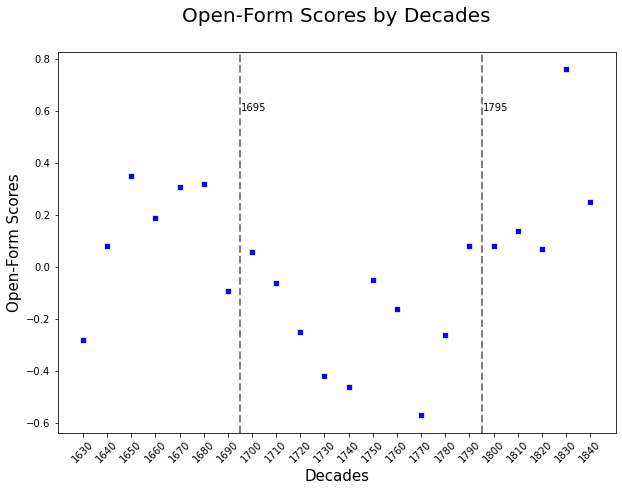

In [15]:
plt.figure(figsize=(10, 7))
plt.title('Open-Form Scores by Decades', fontsize=20, pad=30)
sns.scatterplot(summary.index.tolist(), summary['open_form_score'], color='blue', marker='s')
plt.xticks(summary.index.tolist(), rotation=45)
plt.ylabel('Open-Form Scores', fontsize=15)
plt.xlabel('Decades', fontsize=15)
plt.axvline(1695, color='grey',linestyle='dashed', linewidth=2)
plt.axvline(1795, color='grey',linestyle='dashed', linewidth=2)
plt.text(1695.5, 0.6, '1695')
plt.text(1795.5, 0.6, '1795')
plt.show()

## Conclusions:
1. The highest open-form score (0.76) was observed in the 1830s. However, we observed the next two high open-form scores in the seventeenth century (0.35 in the 1650s and 0.32 in the 1680s).
2. The three lowest open-form scores were in the eighteenth century: the 1770s with -0.57, the 1740s with -0.46, and 1730s with -0.42.
3. There is a wave-like trend in the evolution of the open-form scores: with the dip in the second period.